## 公众号: 大邓和他的PYTHON

## [博客: textdata.cn](https://textdata.cn/)

## [付费视频课 | Python实证指标构建与文本分析](https://textdata.cn/blog/management_python_course/)


<br><br>

## 一、经济政策不确定性指标
经济政策不确定性(Economic Policy Uncertainty, EPU) 通常是用来衡量经济中政策不确定性水平的一种度量方式。 本文参考 Huang, Yun, and Paul Luk. "Measuring economic policy uncertainty in China." China Economic Review 59 (2020): 101367

<br>

### 1.1 新闻数据库


```
人民日报rmrb:       1946-05-15 ~ 2023-12-18
光明日报gmrb:       1985-01-01 ~ 2023-12-18
人民政协报rmzxb:     2008-01-02 ~ 2023-12-18
经济日报jjrb:       2008-01-27 ~ 2023-12-18
中国青年报zqb:     2005-01-01 ~ 2023-12-18
南方周末nfzm:       2008-01-02 ~ 2023-5-31
```

<br>


### 1.2 算法

```
Step-1. 选择了114家中国大陆的报纸，其中包括北京、上海、广州和天津等主要城市的报纸。
Step-2. 对于每家报纸，搜索包含以下三个关键词之一的文章：经济、不确定性和政策。这些关键词的中文和英文对照可以在论文的表格1中找到。
Step-3. 将每个月的文章数量按照满足第一个关键词的文章数量进行缩放。
Step-4. 将时间序列标准化，使其在2000年1月至2011年12月期间的标准差为1。 保证所有媒体计算得到的epu是可比的。
Step-5. 对十家报纸的月度序列进行简单平均，并将指标归一化，使其在2000年1月至2011年12月期间的平均值为100。
```

如果是利用一个媒体进行 类 EPU 指标的构建， 只需用到算法中的前 3 个步骤。

<br><br>

## 二、基本知识

### 2.1 查看数据
大邓的 [新闻数据集 | 含 人民日报/经济日报/光明日报 等 7 家媒体(2023.12.18)](https://textdata.cn/blog/2023-12-14-daily-news-dataset/) 中的所有媒体， 均有csv格式， 内含 date 和 text 两个字段， csv中的每行是一条新闻。

In [40]:
import pandas as pd

df = pd.read_csv('rmrb.csv.gzip', compression='gzip')
df.head()

,date,text
0,2006-10-04,精神文明建设铺就民族的未来（·经典中国·我和我的祖国）\n——优化中的未成年人成长环境\n ...
1,2006-02-05,简单些（今日谈）\n\n 王义堂\n 年过了。 望着厨房里、冰箱内、阳台上打开的和...
2,2006-05-17,立停使用江苏省泰兴化工总厂生产的丙二醇；用标示为泰兴化工总厂的丙二醇生产、配制的药品就地暂控...
3,2006-09-16,认真学习贯彻胡锦涛总书记回信精神<BR/>教书育人 育人为本 促进大学生全面发展\n李长春在...
4,2006-07-17,中国光芯照亮德国世界杯\n\n \n 半导体发光二极管被称作光芯，由大连路明集团研发的...


<br>

### 2.2 日期转化

In [39]:
df['date'] = pd.to_datetime(df['date'])
print('人民日报: ', df['date'].min().date(), '~', df['date'].max().date())

人民日报:  1946-05-15 ~ 2023-12-18


<br>

### 2.3 按日期进行分组
使用日期进行分组， 常见的周期是年Y、月M、日D。 以 ``df.groupby(pd.Grouper(key='date', freq='M'))`` 为例， 会得到不同 year-month 及对应的dataframe

In [42]:
for date, Yfreq_df in df.groupby(pd.Grouper(key='date', freq='Y')):
    print(date, type(Yfreq_df))

1946-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1947-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1948-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1949-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1950-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1951-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1952-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1953-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1954-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1955-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1956-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1957-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1958-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1959-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1960-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1961-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1962-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1963-12-31 00:

In [43]:
for date, Mfreq_df in df.groupby(pd.Grouper(key='date', freq='M')):
    print(date, type(Mfreq_df))

1946-05-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-06-30 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-07-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-08-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-09-30 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-10-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-11-30 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-12-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1947-01-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1947-02-28 00:00:00 <class 'pandas.core.frame.DataFrame'>
1947-03-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1947-04-30 00:00:00 <class 'pandas.core.frame.DataFrame'>
1947-05-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1947-06-30 00:00:00 <class 'pandas.core.frame.DataFrame'>
1947-07-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1947-08-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1947-09-30 00:00:00 <class 'pandas.core.frame.DataFrame'>
1947-10-31 00:

In [ ]:
for date, Dfreq_df in df.groupby(pd.Grouper(key='date', freq='D')):
    print(date, type(Dfreq_df))

1946-05-15 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-16 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-17 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-18 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-19 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-20 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-21 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-22 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-23 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-24 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-25 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-26 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-27 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-28 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-29 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-30 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-05-31 00:00:00 <class 'pandas.core.frame.DataFrame'>
1946-06-01 00:

<br>

### 2.4 文本操作
dataframe中字段如果是字符串格式， 可以用 .str属性， 该str属性具有以下特色功能。

```
#某词
word_pattern1 = '不确定'
#某类词
word_pattern2 = '不确定|不明确|波动|震荡'

#是否含某词   
df['text'].str.contains(word_pattern1)  
#是否含某类词   
df['text'].str.contains(word_pattern2)  

#某词出现的次数 
df['text'].str.count(word_pattern1)  


#某类词出现的次数 
df['text'].str.count(word_pattern2)  
```


在 EPU 的计算中，使用的是contains。另外  即可以是

In [47]:
uncertainty_pattern = '不确定|不明确|波动|震荡|动荡|不稳|未明|不明朗|不清晰|未清晰|难料|难以预料|难以预测|难以预计|难以估计|无法预料|无法预测|无法预计|无法估计|不可预料|不可预测|不可预计|不可估计'


#每条新闻是否出现 uncertainty_pattern ， 出现True，不出现False
df['text'].str.contains(uncertainty_pattern)

0          False
1          False
2          False
3          False
4          False
           ...  
2014656    False
2014657    False
2014658    False
2014659    False
2014660    False
Name: text, Length: 2014661, dtype: bool

<br>

通过加总True，得到出现 uncertainty_pattern 的新闻记录数

In [48]:
df['text'].str.contains(uncertainty_pattern).sum()

56358

<br>

### 2.4 布尔值的计算

且操作，

In [50]:
economic_pattern = '经济|金融'
uncertainty_pattern = '不确定|不明确|波动|震荡|动荡|不稳|未明|不明朗|不清晰|未清晰|难料|难以预料|难以预测|难以预计|难以估计|无法预料|无法预测|无法预计|无法估计|不可预料|不可预测|不可预计|不可估计'
policy_pattern = '政策|制度|体制|战略|措施|规章|规例|条例|政治|执政|政府|政委|国务院|人大|人民代表大会|中央|国家主席|总书记|国家领导人|总理|改革|整改|整治|规管|监管|财政|税|人民银行|央行|赤字|利率'
    
economic_mask = df['text'].fillna('').str.contains(economic_pattern)
policy_mask = df['text'].fillna('').str.contains(policy_pattern)
uncertainty_mask = df['text'].fillna('').str.contains(uncertainty_pattern)

In [55]:
print('enconomic新闻条数: ', economic_mask.sum())
print('policy新闻条数: ', policy_mask.sum())
print('uncertainty新闻条数: ', uncertainty_mask.sum())

print()

print('enconomic&policy同时出现条数: ', (economic_mask & policy_mask).sum())
print('enconomic&policy&uncertainty同时出现条数: ', (economic_mask & policy_mask & uncertainty_mask).sum())

enconomic新闻条数:  617182
policy新闻条数:  1246681
uncertainty新闻条数:  56358

enconomic&policy同时出现条数:  510791
enconomic&policy&uncertainty同时出现条数:  34332


<br><br>

## 三、EPU计算函数

cal_epu_index 是大邓设计，可针对任意一个新闻数据(csv格式) 计算 EPU 。

需要注意， 因为是对一个媒体进行计算，所以没有进行标准化和归一化。 

所以媒体1、媒体2计算得到的两个 ***epu1***、***epu2*** 进行数值大小的比较是没有意义的。 如果你有多个媒体，计算得到多个 ***epu1*** 、***epu2***、 ***epu3***， 想计算 ***mean_epu*** , 那么记得实现论文算法里的 ***step4***， 再执行 ***step5*** 求均值。 

In [59]:
def cal_epu_index(csvf, freq='M'):
    """
    csvf  新闻csv文件的位置， 含date和text两个字段，每行是一条新闻
    freq  epu的粒度， 年Y、月M、日D
    
    返回dataFrame, 含字段date和epu
    """
    import pandas as pd
    economic_pattern = '经济|金融'
    uncertainty_pattern = '不确定|不明确|波动|震荡|动荡|不稳|未明|不明朗|不清晰|未清晰|难料|难以预料|难以预测|难以预计|难以估计|无法预料|无法预测|无法预计|无法估计|不可预料|不可预测|不可预计|不可估计'
    policy_pattern = '政策|制度|体制|战略|措施|规章|规例|条例|政治|执政|政府|政委|国务院|人大|人民代表大会|中央|国家主席|总书记|国家领导人|总理|改革|整改|整治|规管|监管|财政|税|人民银行|央行|赤字|利率'
    
    df = pd.read_csv(csvf, compression='gzip')
    df['date'] = pd.to_datetime(df['date'])
    
    datas = []
    for date, period_df in df.groupby(pd.Grouper(key='date', freq=freq)):
        data = dict()
        data['date'] = date #month是datetime型日期，一般为每个月的最后一日
        economic_mask = period_df['text'].fillna('').str.contains(economic_pattern)
        policy_mask = period_df['text'].fillna('').str.contains(policy_pattern)
        uncertainty_mask = period_df['text'].fillna('').str.contains(uncertainty_pattern)

        #在出现经济词的新闻中，统计出现政策、不确定新的比例
        data['epu'] = (economic_mask & policy_mask & uncertainty_mask).sum() / economic_mask.sum()
        datas.append(data)
    raw_epu_df = pd.DataFrame(datas)
    return raw_epu_df

In [61]:

rmrb_EPU_df = cal_epu_index(csvf='rmrb.csv.gzip', freq='M')
rmrb_EPU_df

,date,epu
0,1946-05-31,0.000000
1,1946-06-30,0.000000
2,1946-07-31,0.021978
3,1946-08-31,0.035294
4,1946-09-30,0.022222
...,...,...
927,2023-08-31,0.098109
928,2023-09-30,0.083333
929,2023-10-31,0.081225
930,2023-11-30,0.072607


In [62]:
gmrb_EPU_df = cal_epu_index(csvf='gmrb.csv.gzip', freq='M')
gmrb_EPU_df

/var/folders/y0/4gqxky0s2t94x1c1qhlwr6100000gn/T/ipykernel_32357/2108514468.py:25: RuntimeWarning: invalid value encountered in scalar divide
  data['epu'] = (economic_mask & policy_mask & uncertainty_mask).sum() / economic_mask.sum()


,date,epu
0,1985-01-31,0.037406
1,1985-02-28,0.026230
2,1985-03-31,0.019608
3,1985-04-30,0.044164
4,1985-05-31,0.013652
...,...,...
463,2023-08-31,0.120000
464,2023-09-30,0.077399
465,2023-10-31,0.057364
466,2023-11-30,0.077143


## 四、可视化
### 4.1 df.plot
df.plot使用的前提是要将日期字段调整为index, 满足下面形态的数据可以使用.plot绘图

In [65]:
rmrb_EPU_df.set_index('date')

,epu
date,
1946-05-31,0.000000
1946-06-30,0.000000
1946-07-31,0.021978
1946-08-31,0.035294
1946-09-30,0.022222
...,...
2023-08-31,0.098109
2023-09-30,0.083333
2023-10-31,0.081225


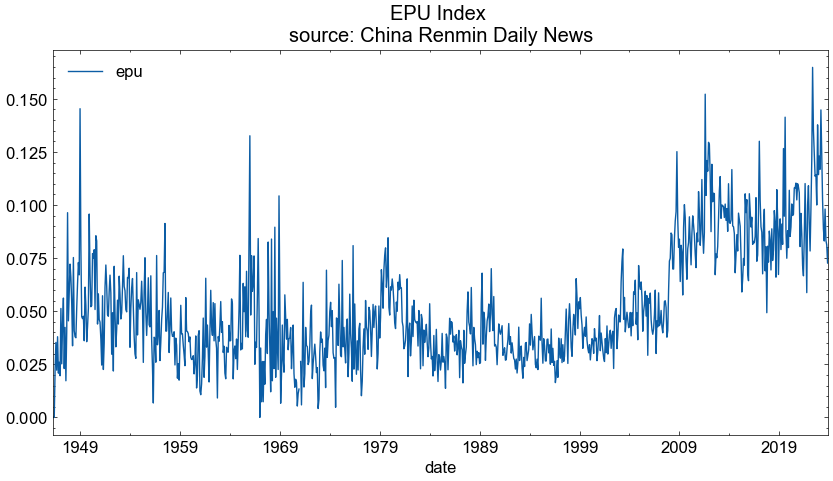

In [101]:
rmrb_EPU_df.set_index('date').plot(figsize=(10, 5), title='EPU Index \nsource: China Renmin Daily News')

### 4.2 支持中文
支持中文的代码，无脑copy

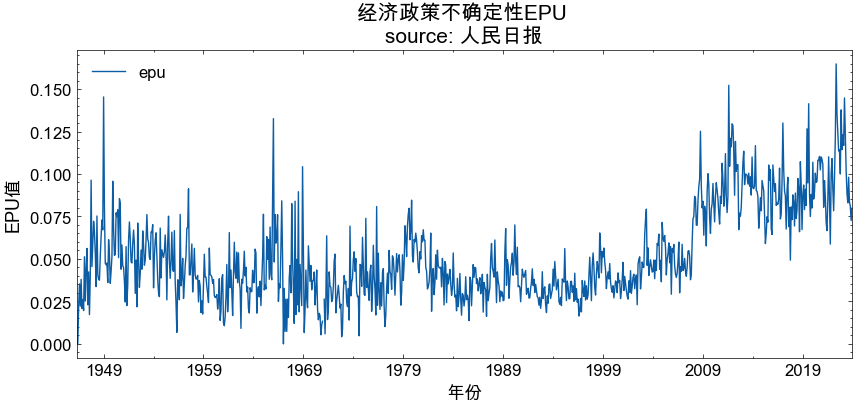

In [105]:
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
import platform
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'svg')

plt.style.use(['science', 'no-latex', 'cjk-sc-font'])
system = platform.system()  # 获取操作系统类型
if system == 'Windows':
    font = {'family': 'SimHei'}
elif system == 'Darwin':
    font = {'family': 'Arial Unicode MS'}
else:
    font = {'family': 'sans-serif'}
matplotlib.rc('font', **font)  # 设置全局字体



rmrb_EPU_df.set_index('date').plot(figsize=(10, 4))
plt.title('经济政策不确定性EPU \nsource: 人民日报', size=15)
plt.xticks(size=12)
plt.xlabel('年份', size=13)
plt.ylabel('EPU值', size=13)
plt.show()

<br>

### 4.3 比较两个媒体的走势

两个新闻媒体覆盖的时间段不同，

```
人民日报rmrb:       1946-05-15 ~ 2023-12-18
光明日报gmrb:       1985-01-01 ~ 2023-12-18
```

截取1985-01-01之后的数据，进行比较。



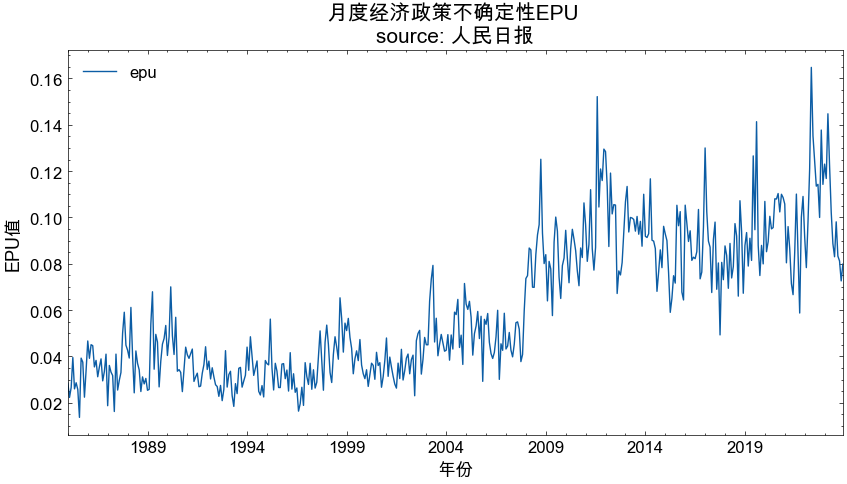

In [103]:
rmrb_EPU_df2 = rmrb_EPU_df[rmrb_EPU_df['date']>'1985-01-01']
gmrb_EPU_df2 = gmrb_EPU_df[gmrb_EPU_df['date']>'1985-01-01']


rmrb_EPU_df2.set_index('date').plot(figsize=(10, 5))
plt.title('月度经济政策不确定性EPU \nsource: 人民日报', size=15)
plt.xticks(size=12)
plt.xlabel('年份', size=13)
plt.ylabel('EPU值', size=13)
plt.show()

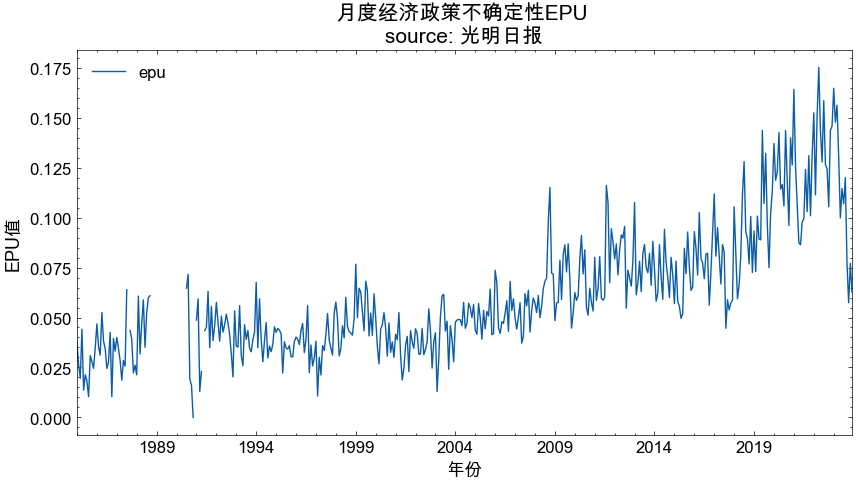

In [104]:
gmrb_EPU_df2.set_index('date').plot(figsize=(10, 5))
plt.title('月度经济政策不确定性EPU \nsource: 光明日报', size=15)
plt.xticks(size=12)
plt.xlabel('年份', size=13)
plt.ylabel('EPU值', size=13)
plt.show()

光明日报数据中缺失了1989年了，所以图中有空挡。但是从两个图中可以看到 epu 的走势大致一致。  